In [ ]:
! pip install ultralytics
!pip install opencv-python

## **Object Detection**

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

## **Load a pretrained model**

In [ ]:
model=YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 72.9MB/s]


In [ ]:
image=cv2.imread('/content/cricket_image.jpeg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


In [ ]:
results=model(image)


0: 448x640 11 persons, 1 tennis racket, 363.0ms
Speed: 4.1ms preprocess, 363.0ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


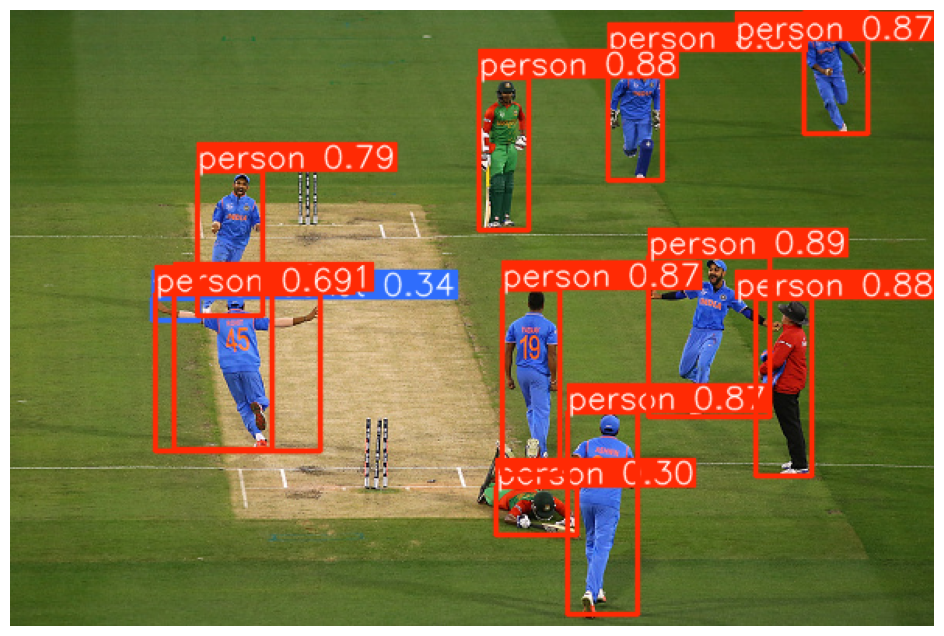

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow((results[0].plot()))
plt.axis('off')
plt.show()

In [ ]:
image2=cv2.imread('/content/football_image.jpeg')
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

In [ ]:
results=model(image2)


0: 448x640 6 persons, 1 sports ball, 220.5ms
Speed: 4.2ms preprocess, 220.5ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


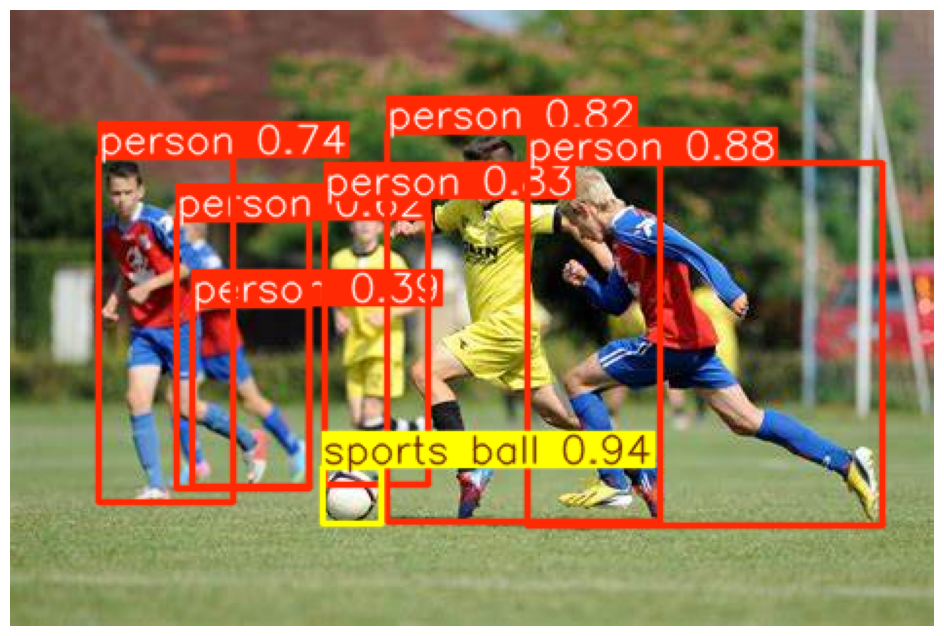

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow((results[0].plot()))
plt.axis('off')
plt.show()

In [ ]:
from google.colab.patches import cv2_imshow

## Video Object Detection

In [ ]:
cap=cv2.VideoCapture('/content/sample video .mp4')

In [ ]:

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 inference on the frame
        results = model(frame)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2_imshow(annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object
cap.release()

In [ ]:
# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, fps, (width, height))

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 inference on the frame
        results = model(frame)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Write the frame to the output video
        out.write(annotated_frame)
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture and writer objects
cap.release()
out.release()

print("Video processing complete. Output saved as 'output.mp4'")


0: 352x640 15 cars, 1 bus, 1 train, 294.1ms
Speed: 7.2ms preprocess, 294.1ms inference, 5.2ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 15 cars, 1 bus, 1 train, 236.9ms
Speed: 5.4ms preprocess, 236.9ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 16 cars, 1 bus, 1 train, 1 truck, 214.7ms
Speed: 3.9ms preprocess, 214.7ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 16 cars, 1 bus, 1 train, 1 truck, 282.1ms
Speed: 6.5ms preprocess, 282.1ms inference, 1.7ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 15 cars, 1 bus, 1 train, 224.4ms
Speed: 6.3ms preprocess, 224.4ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 16 cars, 1 bus, 1 train, 1 truck, 220.3ms
Speed: 6.4ms preprocess, 220.3ms inference, 1.6ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 17 cars, 2 buss, 1 train, 2 trucks, 286.7ms
Speed: 3.7ms preprocess, 286.7ms inference, 1.4ms postproce